In [1]:

import os
from sklearn.model_selection import train_test_split

from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torchvision import transforms
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

from PIL import Image
from pathlib import Path
from glob import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# setting device as GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# CUDA device information
if device.type == 'cuda':
    print('GPU Name:', torch.cuda.get_device_name(0))
    print('Memory Stats:')
    print('  - Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('  - Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')
    print('  - Total:    ', round(torch.cuda.get_device_properties(0).total_memory/1024**3,1), 'GB')

Using device: cuda
GPU Name: NVIDIA GeForce RTX 3070
Memory Stats:
  - Allocated: 0.0 GB
  - Cached:    0.0 GB
  - Total:     8.0 GB


In [3]:
#Loading "face_age" dataset.
filepath = glob("face_age\*")
path_list = []
label_list = []

for folder in filepath:
    print(folder)
    for f in glob(folder+'\*.png'):
        age = int(folder[9:12])
        if 1 <= age <= 3:
            path_list.append(f)
            label_list.append(0)
        elif 4 <= age <= 6:
            path_list.append(f)
            label_list.append(1)
        elif 7 <= age <= 8:
            path_list.append(f)
            label_list.append(2)
        elif 9 <= age <= 11:
            path_list.append(f)
            label_list.append(3)
        elif 12 <= age <= 20:
            path_list.append(f)
            label_list.append(4)
        elif 21 <= age <= 35:
            path_list.append(f)
            label_list.append(5)
        elif 36 <= age <= 50:
            path_list.append(f)
            label_list.append(6)
        elif 51 <= age <= 80:
            path_list.append(f)
            label_list.append(7)
        elif 81 <= age <= 116:
            path_list.append(f)
            label_list.append(8)

print(filepath)
print(len(path_list))
print(len(filepath))

print(label_list[5])

face_age\001
face_age\002
face_age\003
face_age\004
face_age\005
face_age\006
face_age\007
face_age\008
face_age\009
face_age\010
face_age\011
face_age\012
face_age\013
face_age\014
face_age\015
face_age\016
face_age\017
face_age\018
face_age\019
face_age\020
face_age\021
face_age\022
face_age\023
face_age\024
face_age\025
face_age\026
face_age\027
face_age\028
face_age\029
face_age\030
face_age\031
face_age\032
face_age\033
face_age\034
face_age\035
face_age\036
face_age\037
face_age\038
face_age\039
face_age\040
face_age\041
face_age\042
face_age\043
face_age\044
face_age\045
face_age\046
face_age\047
face_age\048
face_age\049
face_age\050
face_age\051
face_age\052
face_age\053
face_age\054
face_age\055
face_age\056
face_age\057
face_age\058
face_age\059
face_age\060
face_age\061
face_age\062
face_age\063
face_age\064
face_age\065
face_age\066
face_age\067
face_age\068
face_age\069
face_age\070
face_age\071
face_age\072
face_age\073
face_age\074
face_age\075
face_age\076
face_age\077

In [4]:
filepath_UTK = glob("UTKFace\*.jpg")

for f in filepath_UTK:
    print(f)
    age = int((f.split('_')[0]).split('\\')[1])
    if 1 <= age <= 3:
        path_list.append(f)
        label_list.append(0)
    elif 4 <= age <= 6:
        path_list.append(f)
        label_list.append(1)
    elif 7 <= age <= 8:
        path_list.append(f)
        label_list.append(2)
    elif 9 <= age <= 11:
        path_list.append(f)
        label_list.append(3)
    elif 12 <= age <= 20:
        path_list.append(f)
        label_list.append(4)
    elif 21 <= age <= 35:
        path_list.append(f)
        label_list.append(5)
    elif 36 <= age <= 50:
        path_list.append(f)
        label_list.append(6)
    elif 51 <= age <= 80:
        path_list.append(f)
        label_list.append(7)
    elif 81 <= age <= 116:
        path_list.append(f)
        label_list.append(8)

print(len(path_list))

UTKFace\100_0_0_20170112213500903.jpg.chip.jpg
UTKFace\100_0_0_20170112215240346.jpg.chip.jpg
UTKFace\100_1_0_20170110183726390.jpg.chip.jpg
UTKFace\100_1_0_20170112213001988.jpg.chip.jpg
UTKFace\100_1_0_20170112213303693.jpg.chip.jpg
UTKFace\100_1_0_20170112215032192.jpg.chip.jpg
UTKFace\100_1_0_20170117195420803.jpg.chip.jpg
UTKFace\100_1_0_20170119212053665.jpg.chip.jpg
UTKFace\100_1_2_20170105174847679.jpg.chip.jpg
UTKFace\100_1_2_20170112213615815.jpg.chip.jpg
UTKFace\100_1_2_20170112222336458.jpg.chip.jpg
UTKFace\101_0_0_20170112213500903.jpg.chip.jpg
UTKFace\101_1_2_20170105174739309.jpg.chip.jpg
UTKFace\103_0_2_20170112213001988.jpg.chip.jpg
UTKFace\105_0_0_20170112213001988.jpg.chip.jpg
UTKFace\105_1_0_20170112213001988.jpg.chip.jpg
UTKFace\105_1_0_20170112213021902.jpg.chip.jpg
UTKFace\105_1_0_20170112213507183.jpg.chip.jpg
UTKFace\105_1_1_20170112213303693.jpg.chip.jpg
UTKFace\10_0_0_20161220222308131.jpg.chip.jpg
UTKFace\10_0_0_20170103200329407.jpg.chip.jpg
UTKFace\10_0_0_

In [5]:
transform = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((200,200)),
                transforms.CenterCrop((200,200)),
                transforms.ToTensor(),    
            ])

class CustomDataset(Dataset):
    def __init__(self, path_list, label_list, **kwargs):
        self.data = path_list
        self.labels = label_list
        self.transform = transform

    '''This function should return sample count in the dataset'''
    def __len__(self):
        return len(self.labels)

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        label = self.labels[index]
        img = Image.open(self.data[index])
        img_converted = img.convert('RGB')
        img_converted = img_converted.resize((200,200))
        img_converted = np.array(img_converted)

        label = np.array(label)

        img_converted = transforms.ToTensor()(img_converted)
        label = torch.tensor(label, dtype = torch.long)
        
        return {'Data': img_converted.to(device), 'Labels': label.to(device)}

In [6]:
x_train, x_val, y_train, y_val = train_test_split(path_list, label_list, test_size=0.3, shuffle=True, random_state=26)
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size=0.3333, shuffle=True, random_state=26)

train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)
val_dataset = CustomDataset(x_val, y_val)

train_DL = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_DL = DataLoader(test_dataset, batch_size=32, shuffle=True)
val_DL = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [7]:
def infer(DL, model):
    model.eval()
    criterion = nn.CrossEntropyLoss()
    total = 0
    correct = 0

    outputs=[]
    data_labels=[]
    prediction_labels=[]

    for i, data in enumerate(DL):
        output = model(data['Data'])
        values, indices = torch.max(output.data, 1)
        outputs.append(output.tolist())
        prediction_labels.append(indices.tolist())
        data_labels.append(data['Labels'].tolist())
        total += data['Labels'].size(0)
        correct += (data['Labels'] == indices).sum().item()


    accuracy=round(correct/total, 5)


    data_labels = [item for sublist in data_labels for item in sublist]
    prediction_labels = [item for sublist in prediction_labels for item in sublist]
    outputs = [item for sublist in outputs for item in sublist]

    return accuracy,data_labels,prediction_labels

In [8]:
class ConvNet(nn.Module):
    '''Define your convolutional neural network'''
    def __init__(self, **kwargs):
        super(ConvNet, self).__init__()
        
        conv_layers = []
        

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3,stride=1,padding=1) 
        self.relu1=nn.ReLU()
        self.maxpool1= nn.MaxPool2d(2, 2)
        
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3,stride=1,padding=1) 
        self.relu2=nn.ReLU()
        self.maxpool2= nn.MaxPool2d(2, 2)
        
        
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3,stride=1,padding=1) 
        self.relu3=nn.ReLU()
        self.maxpool3= nn.MaxPool2d(2, 2)


        self.conv4 = nn.Conv2d(64, 128, kernel_size=3,stride=1,padding=1) 
        self.relu4=nn.ReLU()
        self.maxpool4= nn.MaxPool2d(2, 2)


        self.conv5 = nn.Conv2d(128, 256, kernel_size=3,stride=1,padding=1) 
        self.relu5=nn.ReLU()
        self.maxpool5= nn.MaxPool2d(2, 2)


        self.conv6 = nn.Conv2d(256, 512, kernel_size=3,stride=1,padding=1) 
        self.relu6=nn.ReLU()
        self.maxpool6= nn.MaxPool2d(2, 2)


        conv_layers+=[self.conv1,self.relu1,self.maxpool1]
        conv_layers+=[self.conv2,self.relu2,self.maxpool2]
        conv_layers+=[self.conv3,self.relu3,self.maxpool3]
        conv_layers+=[self.conv4,self.relu4,self.maxpool4]
        conv_layers+=[self.conv5,self.relu5,self.maxpool5]
        conv_layers+=[self.conv6,self.relu6,self.maxpool6]
        
        self.lin1=nn.Linear(in_features=3*3*512,out_features=9)

        self.conv=nn.Sequential(*conv_layers)
     
    def forward(self, x):
        x=self.conv(x)
        x = x.view(-1, 3*3*512) # flatten
        x=self.lin1(x)

        return x

In [9]:
torch.cuda.empty_cache()
model=ConvNet()
model=model.to(device)

loss_function = nn.CrossEntropyLoss()
loss_function = loss_function.to(device)

optimizer = torch.optim.SGD(model.parameters(),lr=0.01,weight_decay=5e-04,momentum=0.5)


def train(epochs, trainDL, valDL, model, loss_function, optimizer):

    val_los=[]
    train_los=[]
    val_acc=[]
    train_acc=[]

    for epoch in range(epochs):
        av_val_loss=0
        av_train_loss=0
        for i, data in enumerate(trainDL):

            model.train()
            output = model(data['Data'])
            output = output.to(device)
            t_loss = loss_function(output, data['Labels'])
            optimizer.zero_grad()
            t_loss.backward()
            optimizer.step()
            
            
            print(f"Epoch: {epoch+1}, Batch: {i+1}")
            
            av_train_loss+=(round(t_loss.item(), 2))
        
        train_loss=round(av_train_loss/(i+1), 2)
        train_los.append(train_loss)

        with torch.no_grad():
          v_loss = 0
          model.eval()
          for j, data in enumerate(valDL):
            loss = loss_function(model(data['Data']), data['Labels'])
            v_loss += loss.item()
          val_loss=round(v_loss/(j+1), 2)
          val_los.append(val_loss)
        
        print("Bu TrainDL", trainDL)
        no_need_1, data_label_train, pred_label_train = infer(trainDL,model)
        train_accuracy = accuracy_score(data_label_train, pred_label_train)
        print("Epoch:" , epoch, "TrainAcc=", train_accuracy)
        print("Bu ValDL", valDL)
        no_need_2 ,data_label_val, pred_label_val= infer(valDL,model)
        val_accuracy = accuracy_score(data_label_val, pred_label_val)
        print("Epoch:" , epoch, "ValAcc=", val_accuracy)

        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)

    return val_los,train_los,train_acc,val_acc

#val_los,train_los,train_acc,val_acc=train(30, train_DL, val_DL, model, loss_function, optimizer)

In [10]:
def plotter(metric, labels, metricName):
    plt.figure(figsize = (12,6))
    xlabel = [str(i) for i in range(len(metric[0]))]
    for i in range(len(labels)):
        plt.plot(xlabel, metric[i], marker='o', markersize=6, linewidth=2, label=labels[i])
    plt.ylabel(metricName)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()


#plotter([train_los, val_los], ["Training","Validation"], "Loss")
#plotter([train_acc, val_acc], ["Training","Validation"], "Accuracy")
#print(train_acc)
#print(val_acc)


In [11]:

torch.cuda.memory_summary(device=None, abbreviated=False)
import torchvision.models as models
model = models.resnet18(pretrained=True) # model degistirilebilir
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 9)
model=model.to(device)

loss_function = nn.CrossEntropyLoss()
loss_function = loss_function.to(device)

optimizer = torch.optim.SGD(model.parameters(),lr=0.001,weight_decay=5e-04,momentum=0.5)
torch.cuda.empty_cache()

def train(epochs, trainDL, valDL, model, loss_function, optimizer):

    val_los=[]
    train_los=[]
    val_acc=[]
    train_acc=[]

    for epoch in range(epochs):
        av_val_loss=0
        av_train_loss=0
        for i, data in enumerate(trainDL):

            model.train()
            output = model(data['Data'])
            output = output.to(device)
            t_loss = loss_function(output, data['Labels'])
            optimizer.zero_grad()
            t_loss.backward()
            optimizer.step()
            
            
            print(f"Epoch: {epoch+1}, Batch: {i+1}")
            
            av_train_loss+=(round(t_loss.item(), 2))
        
        train_loss=round(av_train_loss/(i+1), 2)
        train_los.append(train_loss)

        with torch.no_grad():
          v_loss = 0
          model.eval()
          for j, data in enumerate(valDL):
            loss = loss_function(model(data['Data']), data['Labels'])
            v_loss += loss.item()
          val_loss=round(v_loss/(j+1), 2)
          val_los.append(val_loss)
        
        print("Bu TrainDL", trainDL)
        no_need_1, data_label_train, pred_label_train = infer(trainDL,model)
        train_accuracy = accuracy_score(data_label_train, pred_label_train)
        print("Epoch:" , epoch, "TrainAcc=", train_accuracy)
        print("Bu ValDL", valDL)
        no_need_2 ,data_label_val, pred_label_val= infer(valDL,model)
        val_accuracy = accuracy_score(data_label_val, pred_label_val)
        print("Epoch:" , epoch, "ValAcc=", val_accuracy)

        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)

    return val_los,train_los,train_acc,val_acc

val_los,train_los,train_acc,val_acc=train(20, train_DL, val_DL, model, loss_function, optimizer) # train for 8 epochs

Epoch: 1, Batch: 1
Epoch: 1, Batch: 2
Epoch: 1, Batch: 3
Epoch: 1, Batch: 4
Epoch: 1, Batch: 5
Epoch: 1, Batch: 6
Epoch: 1, Batch: 7
Epoch: 1, Batch: 8
Epoch: 1, Batch: 9
Epoch: 1, Batch: 10
Epoch: 1, Batch: 11
Epoch: 1, Batch: 12
Epoch: 1, Batch: 13
Epoch: 1, Batch: 14
Epoch: 1, Batch: 15
Epoch: 1, Batch: 16
Epoch: 1, Batch: 17
Epoch: 1, Batch: 18
Epoch: 1, Batch: 19
Epoch: 1, Batch: 20
Epoch: 1, Batch: 21
Epoch: 1, Batch: 22
Epoch: 1, Batch: 23
Epoch: 1, Batch: 24
Epoch: 1, Batch: 25
Epoch: 1, Batch: 26
Epoch: 1, Batch: 27
Epoch: 1, Batch: 28
Epoch: 1, Batch: 29
Epoch: 1, Batch: 30
Epoch: 1, Batch: 31
Epoch: 1, Batch: 32
Epoch: 1, Batch: 33
Epoch: 1, Batch: 34
Epoch: 1, Batch: 35
Epoch: 1, Batch: 36
Epoch: 1, Batch: 37
Epoch: 1, Batch: 38
Epoch: 1, Batch: 39
Epoch: 1, Batch: 40
Epoch: 1, Batch: 41
Epoch: 1, Batch: 42
Epoch: 1, Batch: 43
Epoch: 1, Batch: 44
Epoch: 1, Batch: 45
Epoch: 1, Batch: 46
Epoch: 1, Batch: 47
Epoch: 1, Batch: 48
Epoch: 1, Batch: 49
Epoch: 1, Batch: 50
Epoch: 1,

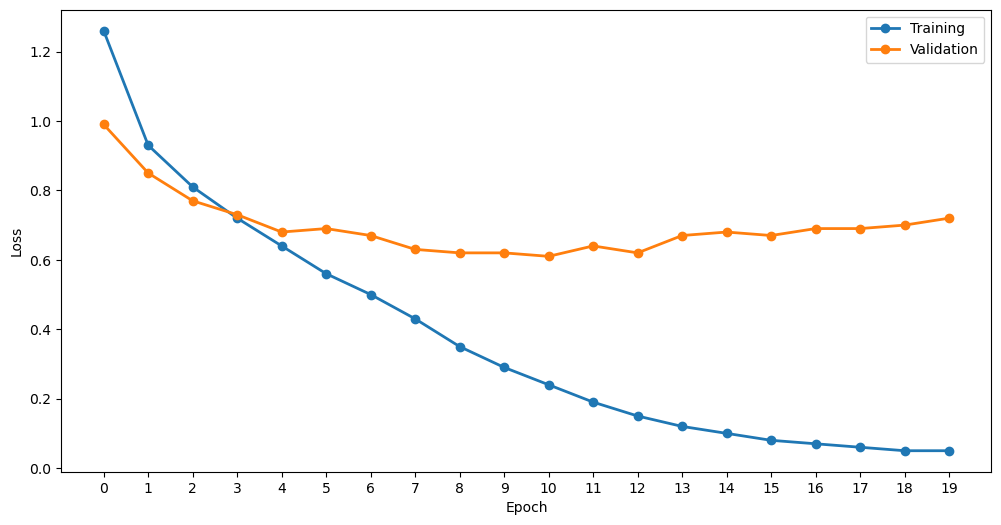

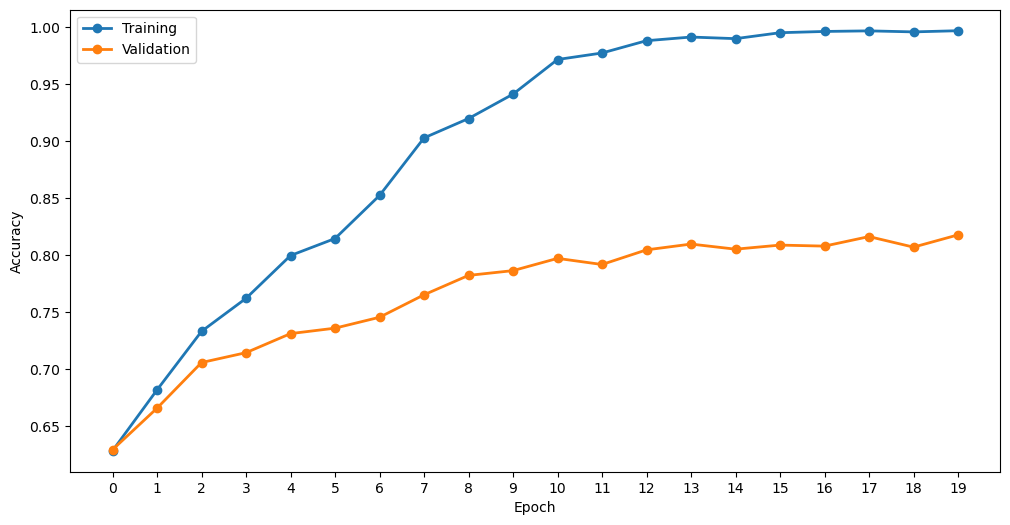

[0.628423926956225, 0.6817987882925164, 0.7331683590750064, 0.7621384077139688, 0.7996842734021674, 0.8146172881645192, 0.8523764826350371, 0.9028927382882499, 0.919873709360867, 0.9412919191057257, 0.9716699377079956, 0.9773871490741531, 0.9881815854595102, 0.9913815171942999, 0.9899735472309924, 0.9951787695195836, 0.996288079187644, 0.9968000682652104, 0.9959040873794692, 0.9969280655346019]
[0.6293309438470729, 0.6657706093189965, 0.705794504181601, 0.7144563918757467, 0.7311827956989247, 0.7359617682198327, 0.7455197132616488, 0.7652329749103942, 0.782258064516129, 0.7864396654719236, 0.7971923536439666, 0.7918160095579451, 0.8046594982078853, 0.80973715651135, 0.8052568697729988, 0.8088410991636799, 0.8079450418160096, 0.8163082437275986, 0.8070489844683393, 0.8178016726403823]


In [12]:
def plotter(metric, labels, metricName):
    plt.figure(figsize = (12,6))
    xlabel = [str(i) for i in range(len(metric[0]))]
    for i in range(len(labels)):
        plt.plot(xlabel, metric[i], marker='o', markersize=6, linewidth=2, label=labels[i])
    plt.ylabel(metricName)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()


plotter([train_los, val_los], ["Training","Validation"], "Loss")
plotter([train_acc, val_acc], ["Training","Validation"], "Accuracy")
print(train_acc)
print(val_acc)

In [13]:
test_accuracy,FCN_data_labels,FCN_prediction_labels=infer(test_DL, model)

print("Accuracy =",accuracy_score(FCN_data_labels, FCN_prediction_labels))

#print("Confusion Matrix ",confusion_mat)
print("Precision =", precision_score(FCN_data_labels, FCN_prediction_labels, average='macro'))
print("Recall =", recall_score(FCN_data_labels, FCN_prediction_labels, average='macro'))
print("F1 =", f1_score(FCN_data_labels, FCN_prediction_labels, average='macro'))

Accuracy = 0.8187248021502165
Precision = 0.8139262149701497
Recall = 0.8116376144529407
F1 = 0.8112803139740907


[[ 742   13    3    0    2    1    0    1    0]
 [  17  186   11   11    0    3    1    0    0]
 [   1    6  107    6   10    8    0    0    0]
 [   0    3    6  125   10    2    1    0    0]
 [   0    4    4   13  398   65    7    1    0]
 [   1    3    5    2  107 2125  302   48    1]
 [   0    0    1    2    8  161  612   97    1]
 [   0    0    0    0    4   52  148 1053   20]
 [   0    0    0    0    0    0    0   41  135]]


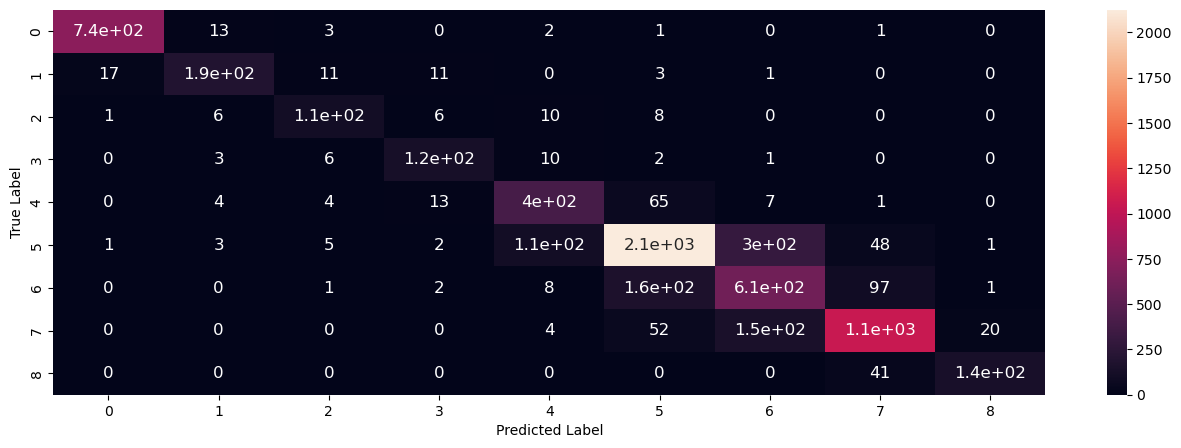

In [14]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.models as models
confusion_mat=confusion_matrix(np.array(FCN_prediction_labels),np.array(FCN_data_labels))
print(confusion_mat)
plt.figure(figsize = (16,5))
ax = sn.heatmap(confusion_mat, annot=True, annot_kws={"size": 12})
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.show()